In [1]:
from keras.datasets import reuters

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [3]:
print(len(train_data), len(train_labels), len(test_data), len(test_labels))

8982 8982 2246 2246


In [4]:
word_index = reuters.get_word_index()
reversed_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [5]:
decoded_newswire = ' '.join([reversed_word_index.get(i - 3, '?') for i in train_data[0]])

In [6]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [7]:
import numpy as np
def vectorize_sequences(sequences, dim=10000):
  result = np.zeros((len(sequences), dim))
  for i, sequence in enumerate(sequences):
    # 對每一個 sequence 裡的竹個元素改為 1
    result[i, sequence] = 1.
  return result

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1
  return results

In [9]:
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)
# 或者直接使用 to_categorical()

In [10]:
from keras import layers, Sequential

model = Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation='softmax') #輸出 46 個類別
])

In [11]:
from keras import optimizers, losses, metrics
model.compile(optimizer='rmsprop',
              loss=losses.categorical_crossentropy,
              metrics=[metrics.acc])

In [12]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [13]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 23ms/step - loss: 2.6006 - accuracy: 0.0000e+00 - val_loss: 1.7097 - val_accuracy: 0.0000e+00
Epoch 2/20
16/16 [==============================] - 0s 12ms/step - loss: 1.4015 - accuracy: 0.0000e+00 - val_loss: 1.2810 - val_accuracy: 0.0000e+00
Epoch 3/20
16/16 [==============================] - 0s 12ms/step - loss: 1.0340 - accuracy: 0.0000e+00 - val_loss: 1.1606 - val_accuracy: 0.0000e+00
Epoch 4/20
16/16 [==============================] - 0s 12ms/step - loss: 0.8090 - accuracy: 0.0000e+00 - val_loss: 1.0280 - val_accuracy: 0.0000e+00
Epoch 5/20
16/16 [==============================] - 0s 12ms/step - loss: 0.6461 - accuracy: 0.0000e+00 - val_loss: 0.9541 - val_accuracy: 0.0000e+00
Epoch 6/20
16/16 [==============================] - 0s 12ms/step - loss: 0.5100 - accuracy: 0.0000e+00 - val_loss: 0.9581 - val_accuracy: 0.0000e+00
Epoch 7/20
16/16 [==============================] - 0s 12ms/step - loss: 0.4140 - accuracy: 0.0000e+00 - v

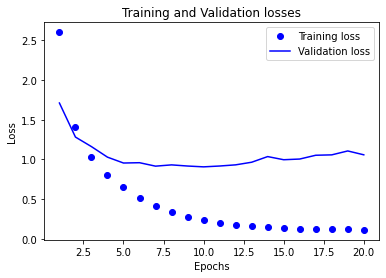

In [14]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title("Training and Validation losses")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

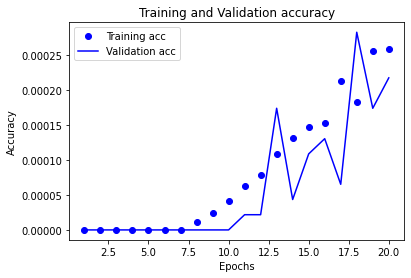

In [15]:
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title("Training and Validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()